# Fully Connected Example

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K

import matplotlib.pyplot as plt
from random import randint

## Check if GPU is avalilable

In [2]:
tf.config.list_physical_devices('GPU')

[]

## Load Data

In [3]:
num_classes = 10
image_shape = (28, 28, 1)
input_shape = (28 * 28)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# 2D image (28 * 28) to 1D vector (784)
x_train = x_train.reshape(-1, input_shape)
x_test = x_test.reshape(-1, input_shape)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 784, 1)
y_test shape: (10000, 10)


## Visualize data

 --- Example 1 --- 


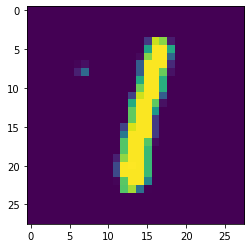

Y training:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Class:  1
 --- Example 2 --- 


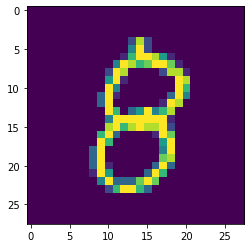

Y training:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Class:  8
 --- Example 3 --- 


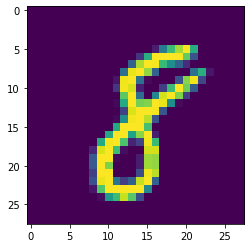

Y training:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Class:  8
 --- Example 4 --- 


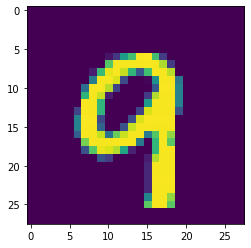

Y training:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Class:  9
 --- Example 5 --- 


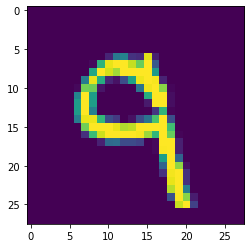

Y training:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Class:  9


In [4]:
for i in range(5):
    print(' --- Example ' + str(i+1)+ ' --- ')
    rand_index = randint(0, x_train.shape[0])
    plt.imshow(x_train[rand_index].reshape(image_shape))
    plt.show()
    print('Y training: ', y_train[rand_index])
    print('Class: ', np.argmax(y_train[rand_index]))

## Create Model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dropout(0.5),
        layers.Dense(30, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


## Learn Model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 1.1920 - accuracy: 0.5949 - val_loss: 0.4001 - val_accuracy: 0.9142
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.8128 - accuracy: 0.7324 - val_loss: 0.3224 - val_accuracy: 0.9260
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.7424 - accuracy: 0.7576 - val_loss: 0.2864 - val_accuracy: 0.9343
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.7075 - accuracy: 0.7678 - val_loss: 0.2672 - val_accuracy: 0.9357
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.7735 - val_loss: 0.2624 - val_accuracy: 0.9378
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.6728 - accuracy: 0.7788 - val_loss: 0.2439 - val_accuracy: 0.9388
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.6581 - accuracy: 0.7816 - val_loss: 0.2433 - val_accuracy: 0.9425
Epoch 

## Validate Results

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25594562292099
Test accuracy: 0.9319000244140625


## Visualize predictions

 --- Prediction 1 --- 


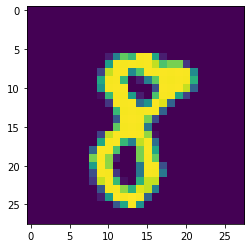

NN output:  [[1.5807875e-04 1.7240563e-04 3.7602538e-03 4.7974312e-03 1.5287189e-04
  1.0456233e-02 2.1259541e-05 5.1665463e-04 9.7508925e-01 4.8755761e-03]]
Highest activation:  8
 --- Prediction 2 --- 


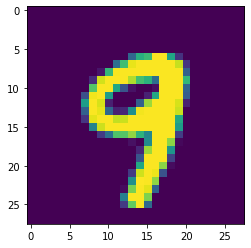

NN output:  [[4.8479181e-09 1.8634913e-07 4.1907792e-06 1.0240518e-03 3.3030391e-02
  7.7011524e-04 5.6012592e-08 6.5837912e-03 1.0826132e-03 9.5750451e-01]]
Highest activation:  9
 --- Prediction 3 --- 


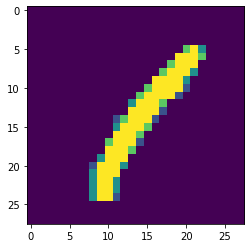

NN output:  [[6.3635173e-07 9.2655510e-01 1.7713656e-03 2.0737990e-03 2.0079371e-04
  2.8351718e-03 8.5918262e-05 1.0117063e-03 6.5394066e-02 7.1468385e-05]]
Highest activation:  1
 --- Prediction 4 --- 


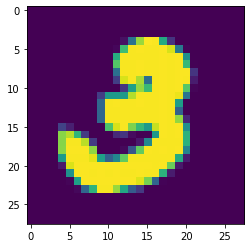

NN output:  [[3.3993091e-04 5.4411771e-06 2.8022850e-02 9.6637583e-01 3.6226231e-09
  2.3823180e-03 7.9896864e-08 5.5649225e-06 2.8584788e-03 9.5350479e-06]]
Highest activation:  3
 --- Prediction 5 --- 


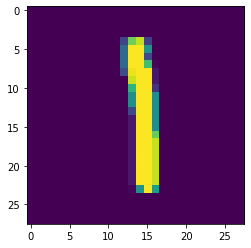

NN output:  [[3.6754412e-07 9.7829962e-01 9.8658563e-04 6.7315721e-03 1.3672144e-04
  1.5936389e-03 4.5504872e-05 4.4326633e-03 7.1469429e-03 6.2642194e-04]]
Highest activation:  1


In [8]:
for i in range(5):
    print(' --- Prediction ' + str(i+1)+ ' --- ')
    rand_index = randint(0, x_test.shape[0])
    
    x_data = x_test[rand_index]
    prediction = model.predict(np.expand_dims(x_data, axis=0))
    
    plt.imshow(x_data.reshape(image_shape))
    plt.show()
    print('NN output: ', prediction)
    print('Highest activation: ', np.argmax(prediction))